<a href="https://colab.research.google.com/github/RWLab/crypto-pod/blob/main/Using_R_in_the_Crypto_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using R in the Crypto Lab

This is a Jupyter notebook in the cloud with an R kernel.

You can type text into it like this. 

In [ ]:
# And you can type code into it like this
print("hello")

[1] "hello"


It's not as good as an RNotebook - so if you are used to using RNotebooks in RStudio you will find it quite clunky at first. 

But it has the huge advantage that we can run it easily in the cloud on our datasets, so anyone in the community can reproduce your research.


# R Basics

You'll mostly use R interactively. Kinda like you're talking to it and it's doing what you say, step by step. 

## What happens when R starts?

When R starts, some `packages` are `attached` to your session. 

They become a `search list` that R looks at whenever you ask it to do something. 

You can see those with the `search()` command

In [ ]:
search()

[1] ".GlobalEnv"        "jupyter:irkernel"  "package:stats"    
 [4] "package:graphics"  "package:grDevices" "package:utils"    
 [7] "package:datasets"  "package:methods"   "Autoloads"        
[10] "package:base"

The first item `.GlobalEnv` is the "global environment". This is where the stuff you create will live.

The other `packages` are the packages that contain base R packages. And the jupyter kernel colab needs.  

## Objects

Everything in R is an object. 

Let's make an object x and set its value to 10. 

`<-` is the assignment operator which is used to assign a value to an object.


In [ ]:
x <- 10

By default, objects get created in a "global environment". You can list the objects in your global environment using `ls()`

In [ ]:
ls()

[1] "x"

We can use `str()` to look at the type of the object.

In [ ]:
str(x)

 num 10


It's a number. 

And we can display the value of `x` like this

In [ ]:
x

[1] 10

## Functions are also objects

Having an object is only useful if I can interact with it and do something with it. Functions let me do this. 

Functions operate on objects and return other objects.
(Sometimes they also transform existing objects. This is called a "side-effect")

Let's use the function `sum()` to add up some numbers.


In [ ]:
sum(1,2,3)

[1] 6

We call the numbers in the brackets "arguments". 

In this case, we didn't do anything with the result of that function, so R just returns the result to the "console". You see it below the cell in the notebook.

We could also have used the assignment operator to assign the value of x to the result of the function.

In [ ]:
x <- sum(1,2,3)

No output was sent to the console because we put it in the object x instead. 

In [ ]:
x

[1] 6

If we try to assign it to an object that doesn't exit, R will create that object for us. Let's try to set it to `y`. 

In [ ]:
y <- sum(1,2,3)
ls()

[1] "x" "y"

A function is actually an object.

In [ ]:
str(sum)

function (..., na.rm = FALSE)  


To see help on a function use the `?` command

In [ ]:
?sum

R help text doesn't always render particularly well in Colab. So google (or a local R installation) can be useful. 

Don't feel compelled to read all the help text. The examples are usually the most useful thing.

### Creating your own functions

We can create our own function.


In [ ]:
bettersum <- function(a,b) {
  return(a+b+1)
}

ls()

[1] "bettersum" "x"         "y"

In [ ]:
bettersum(1,2)

[1] 4

# Vectors and Lists

There are really only two important `basic types` of object in R
*   vectors
*   lists

## Vectors

Vectors contains multiple elements of the same type. We create a vector using the ` c()` function.

In [ ]:
num_vector <- c(1,2,3,4)
str(num_vector)

 num [1:4] 1 2 3 4


In [ ]:
char_vector <- c('a','b','c','d')
str(char_vector)

 chr [1:4] "a" "b" "c" "d"


In [ ]:
boolean_vector <- c(TRUE, FALSE, TRUE, FALSE)
str(boolean_vector)

 logi [1:4] TRUE FALSE TRUE FALSE


If we try to define a vector with multiple types in it then it gets created as a character vector.

In [ ]:
mult_vector <- c(1,'b', TRUE, 5)
str(mult_vector)

 chr [1:4] "1" "b" "TRUE" "5"


Often you need to create a sequence of numbers. You can do this using the `:` operator or the `seq()` function.

In [ ]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
seq(1, 10, by = 2)

[1] 1 3 5 7 9

### Subscripting

#### Accessing elements of a **vector**

How do we get at the numbers in a vector? By subscripting.

In [ ]:
num_vector
num_vector[1]

[1] 1 2 3 4

[1] 1

Yeah, the first element of a vector is 1. This usually upsets people who like python. You'll cope.



In [ ]:
num_vector
num_vector[4]

[1] 1 2 3 4

[1] 4

We can also subscript using a vector of elements to get a part of the vector back. 

For example, if we want to pull out the 2nd and 3rd element...

In [ ]:
num_vector
num_vector[2:3]

[1] 1 2 3 4

[1] 2 3

In [ ]:
num_vector
num_vector[c(2,3)]

[1] 1 2 3 4

[1] 2 3

We can use a logical vector to return elements of a vector too.

In [ ]:
num_vector
num_vector[c(FALSE,FALSE,TRUE,TRUE)]

[1] 1 2 3 4

[1] 3 4

If you try to access an element that doesn't exist, you'll get NA back

In [ ]:
num_vector
num_vector[99]

[1] 1 2 3 4

[1] NA

#### Replacing elements of a vector

We can also use subscripting to replace elements of a vector, like this:

In [ ]:
num_vector
num_vector[2] <- 100
num_vector

[1] 1 2 3 4

[1]   1 100   3   4

You can do multiple at the same time, if you like...

In [ ]:
num_vector
num_vector[2:3] <- 99:100
num_vector

[1]   1 100   3   4

[1]   1  99 100   4

#### Operating on a Vector

When you interact with any number or character object in R, you are actually interacting with a vector. 

When we created an object `x <- 10` earlier, we actually created a vector with only one element in it.

In [ ]:
x <- 10
xvec <- c(10)

str(x)
str(xvec)

 num 10
 num 10


You can see this because you can subset it like a vector.

In [ ]:
x[1]
xvec[1]

[1] 10

[1] 10

Because R treats a vector as a primary type, most functions will operate on all the elements in a vector. 

Let's create a vector and then add 100.

In [ ]:
x <- c(10,20,30,40)
x + 100

[1] 110 120 130 140

Each individual element gets 100 added to it.

Most functions will operate elementwise on vectors, including the one we created earlier.


In [ ]:
bettersum
bettersum(x, 100)

function(a,b) {
  return(a+b+1)
}
<bytecode: 0x563674aa1770>

[1] 111 121 131 141

What happens if we try to add two vectors of the same length together?



In [ ]:
c(1,2,3,4) + c(1,2,3,4)

[1] 2 4 6 8

It adds the `nth` element of each vector together and returns a vector of the same size.

What if we try to add vectors of different length? 

Well, we did that earlier when we added 100 to the vector. What that did was this... 

In [ ]:
x
x + 100
x + c(100, 100, 100, 100)

[1] 10 20 30 40

[1] 110 120 130 140

[1] 110 120 130 140

It repeated the value to be the same length as the vector it was adding to. It does the same thing with any vector which is shorter than the first vector.

In [ ]:
x
x + c(1, 100)
x + c(1, 100, 1, 100)

[1] 10 20 30 40

[1]  11 120  31 140

[1]  11 120  31 140

It will error if the vector lengths are not a multiple of one another.

In [ ]:
x 
x + c(1, 100, 9) 

[1] 10 20 30 40

Warning message in x + c(1, 100, 9):
“longer object length is not a multiple of shorter object length”


[1]  11 120  39  41

The order of the vectors isn't important. The bigger one doesn't have to be first. If the smaller one is first, then the first will repeat to match the length of the longer one.

In [ ]:
c(1,2) + c(10,20,30,40)
c(1,2,1,2) + c(10,20,30,40)

[1] 11 22 31 42

[1] 11 22 31 42

This can be useful for replacing elements of vectors too. For example, you can set all or some elements of a vector to a certain value.

In [ ]:
x <- c(1,2,3)
x[] <- 10
x

[1] 10 10 10

In [ ]:
x[1:2] <- 99
x

[1] 99 99 10

Some of this will feel a bit magical to start with but you'll find that R often has exactly the default behaviour you want. 

## Lists

The other important `basic type` is a list. 

This is just like a vector, but the component of the list can be different types of object - including complicated ones.

You won't deal with lists much to start with, so I just want you to know they exist.

In [ ]:
mylist <- list("Hello", 2, TRUE, c(1,2,4,5))
mylist

[[1]]
[1] "Hello"

[[2]]
[1] 2

[[3]]
[1] TRUE

[[4]]
[1] 1 2 4 5

In [ ]:
mylist[1]

$word
[1] "Hello"

This returns a list... you can get the element like this.

In [ ]:
mylist[[1]]

[1] "Hello"

In [ ]:
mylist[[4]]

[1] 1 2 4 5

Elements in lists can also have names

In [ ]:
names(mylist) <- c('word', 'number', 'boolean', 'vector')
mylist

$word
[1] "Hello"

$number
[1] 2

$boolean
[1] TRUE

$vector
[1] 1 2 4 5

In [ ]:
mylist['word']

$word
[1] "Hello"

In [ ]:
mylist[['word']]
mylist$word

[1] "Hello"

[1] "Hello"

## Matrix and Data Frame

Matrices and data frames are rectangular tables of data.

All elements of a matrix are the same type. 
In a data frame each column has to be the same type, but columns can be different types.

You'll mostly work with data frames.

You can think of them as vectors glued side by side.

For example, let's create a data frame containing fake price data.

In [ ]:
day_col <- c('Mon', 'Tue', 'Wed', 'Thr')
price_col <- c(100, 99, 96, 101)
volume_col <- c(10000, 10001, 10100, 9999)

df <- data.frame(day_col, price_col, volume_col)

df

day_col,price_col,volume_col
<chr>,<dbl>,<dbl>
Mon,100,10000
Tue,99,10001
Wed,96,10100
Thr,101,9999


In [ ]:
# Look at the structure of the data frame
str(df)

# Get the number of rows
nrow(df)

# Get the number of columns

'data.frame':	4 obs. of  3 variables:
 $ day_col   : chr  "Mon" "Tue" "Wed" "Thr"
 $ price_col : num  100 99 96 101
 $ volume_col: num  10000 10001 10100 9999


[1] 4

In the lab, you'll interact with data frames using the `dplyr` package.

# Using R in the Lab

When you're using R in the Lab, you'll mostly be using the `tidyverse` package and the functions in the `rwRTools` package, rather than base R.

You'll mostly be "chaining tidyverse API calls together" rather than writing base R code.

The first thing you need to do is to install the libraries you need. You can do this using the `rw crypto load data utils libraries` snippet.  

In [ ]:
# snippet: rw load rwrtools for crypto pod
if(!require("pacman")) install.packages("pacman")
pacman::p_load_current_gh("RWLab/rwRtools", dependencies = TRUE)
pacman::p_load(tidyverse, lubridate, purrr, zoo)


It will take a minute or so to install the packages you need into your environment. Good time to make a cup of tea

## Getting Data

We need data to do data analysis. 

The first thing you need to do is authorize so we know you are a lab member and you can pull our datasets.'

USe the `rw data auth` snippet for this job. 

Cick the link, sign into your account, paste the authorisation code into the box below, and press enter.


In [ ]:
# snippet: rw data auth v.0.1
rwlab_data_auth()

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-0l5tra7gl2i20iftqangp7iskte4f3s0.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code:  4/1AY0e-g7WUkyirD40L5uuSPGqO4MW9pkMtR-9EaYmD8vtiEI_eQTJH4N4_SM


Now we can use the `rw crypto load coinmetrics` snippet to pull daily price and market cap data for a number of cryptocurrencies.



In [ ]:
# snippet: load coinmetrics data v0.1
prices <- rwRtools::crypto_get_coinmetrics(force_update = TRUE)
prices %>%
  head()

2021-06-24 02:15:12 -- Saved coinmetrics.csv to coinmetrics/coinmetrics.csv (6.1 Mb)



File successfully transferred



── Column specification ────────────────────────────────────────────────────────
cols(
  ticker = col_character(),
  date = col_date(format = ""),
  price_usd = col_double(),
  market_cap = col_double()
)




ticker,date,price_usd,market_cap
<chr>,<date>,<dbl>,<dbl>
1INCH,2020-12-26,1.6193281,2428992153
1INCH,2020-12-27,1.0723502,1608525301
1INCH,2020-12-28,1.1046742,1657011227
1INCH,2020-12-29,0.8937904,1340685538
1INCH,2020-12-30,1.1013066,1651959828
1INCH,2020-12-31,1.3652374,2047856106


You can see we got a nice table of price data.

*But, woah there a sec, how did that happen?!*

First we used the rwRtools function to populate an object called `coinmetrics`. Let's look at that guy.

In [ ]:
str(coinmetrics)

spec_tbl_df [123,285 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ticker    : chr [1:123285] "1INCH" "1INCH" "1INCH" "1INCH" ...
 $ date      : Date[1:123285], format: "2020-12-26" "2020-12-27" ...
 $ price_usd : num [1:123285] 1.619 1.072 1.105 0.894 1.101 ...
 $ market_cap: num [1:123285] 2.43e+09 1.61e+09 1.66e+09 1.34e+09 1.65e+09 ...
 - attr(*, "spec")=
  .. cols(
  ..   ticker = col_character(),
  ..   date = col_date(format = ""),
  ..   price_usd = col_double(),
  ..   market_cap = col_double()
  .. )


It's a dataframe with four columns, just like you imagined it was. This was pulled from our google cloud storage bucket (https://storage.cloud.google.com/crypto_research_pod/coinmetrics.csv: 

## What the hell is "%>%"?

Then we used the following code to display the first few rows of the data frame. What on earth was going on there?

In [ ]:
prices %>%
  head()

ticker,date,price_usd,market_cap
<chr>,<date>,<dbl>,<dbl>
1INCH,2020-12-26,1.6193281,2428992153
1INCH,2020-12-27,1.0723502,1608525301
1INCH,2020-12-28,1.1046742,1657011227
1INCH,2020-12-29,0.8937904,1340685538
1INCH,2020-12-30,1.1013066,1651959828
1INCH,2020-12-31,1.3652374,2047856106


That `%>%` guy is a "pipe". 

You'll seem him all over the place in the Lab. He's very useful for writing nice easy legible code.

And legible code is very important, because we're sharing research here. You will likely spend more time reading other people's code than writing your own. So we want to be kind to each other and write things in the cleanest, most transparent way possible.

When we call a function we use usually write it as `verb(object)`

Pick up the cat ==> `pickup(cat)`

This makes sense when you are only doing one thing to that object. But often we are doing multiple things to the cat. We might say...

Get the cat
  - then pick it up
  - then put it on your lap
  - then stroke it.

In our normal syntax this might look like this:

`stroke(put_on_lap(pick_up(cat)))`

Which looks backwards and confusing. 

Now, you could write it like this: 

```
result <- pickup(cat)
result <- put_on_lap(cat)
stroke(result)
```

The pipe operator %>% lets us chain together these steps in a clear way without the intermediate steps. And it looks just like how we'd say it. 

Get the cat
  - then pick it up
  - then put it on your lap
  - then stroke it.



```
cat %>%
  pick_up() %>%
  put_on_lap() %>%
  stroke()
```

The pipe operator lets us chain together operations on the same object - which is a thing that we do a lot in data analysis. 

And the `tidyverse` functions we use in Lab are written in a consistent way that makes it easy to chain things together. 

### What exactly is the pipe operator doing?

Rememver our sum function? We can use it to add up numbers.


In [ ]:
sum(1,2,3)

[1] 6

Those things we passed to the function are called arguments. 

The pipe operator lets us insert the first of those arguments from outside the function itself.

In [ ]:
1 %>% sum(2,3)
sum(1,2,3)

[1] 6

[1] 6

We've taken the first argument of the future outside of the function and we "pipe it into it" from outside it.

This makes it very easy to chain operations together, which is a thing you do a lot in data science operations.

Let's first go step-by-step through a simple example so you internalize what's going on, then we'll go through a real life example on some crypto data.

#### Example: Counting donuts in a contrived way

Get all real numbers between 1 and 10
   - take the mean of those numbers
   - multiply the result by 10
   - output it as a character string with "donuts" appended on the end.

We'll build it up bit by bit.


In [ ]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
1:10 %>%
  mean()

[1] 5.5

In [ ]:
1:10 %>%
  mean() %>%
  prod(10)


[1] 55

In [ ]:
1:10 %>%
  mean() %>%
  prod(10) %>%
  paste("donuts")

[1] "55 donuts"

You'll want to build your chains up step by step like this, so you can ensure each component is doing what you expect it to do.

Now let's look at a real use case.

# Using `dplyr` for Financial Data Analysis

## Tidy data

Life gets way easier if your data is in a nice "tidy" shape. 

Lab datasets are pre-prepared in a nice tidy state for analysis. 

Let's look at our `prices` data. The `head()` function is very useful to display the top of the data in a data frame. Let's use that. 

In [ ]:
head(prices)

ticker,date,price_usd,market_cap
<chr>,<date>,<dbl>,<dbl>
1INCH,2020-12-26,1.6193281,2428992153
1INCH,2020-12-27,1.0723502,1608525301
1INCH,2020-12-28,1.1046742,1657011227
1INCH,2020-12-29,0.8937904,1340685538
1INCH,2020-12-30,1.1013066,1651959828
1INCH,2020-12-31,1.3652374,2047856106


Of course, you've just learned that you could also have piped the `prices` object into the `head()` function like this 

In [ ]:
prices %>% head()

ticker,date,price_usd,market_cap
<chr>,<date>,<dbl>,<dbl>
1INCH,2020-12-26,1.6193281,2428992153
1INCH,2020-12-27,1.0723502,1608525301
1INCH,2020-12-28,1.1046742,1657011227
1INCH,2020-12-29,0.8937904,1340685538
1INCH,2020-12-30,1.1013066,1651959828
1INCH,2020-12-31,1.3652374,2047856106


Our data has been organized such that:


*   Every column is a variable
*   Every row is a unique observation 

Each row represents a price and market cap observation for a given coin (ticker) and stock.

`ticker` and `date` uniquely identify an observation.

`price_usd` and `market_cap` are measurements for each observation.


## The main dplyr verbs



*  `filter()` picks outs observations (rows) by some filter criteria
*  `arrange()` reorders the observations (rows)
*  `select()` picks out the variables (columns)
*  `mutate()` creates new variables (columns) by applying transformations to existing variables
*   `summarise()` allows you to group and summarise data – reducing the data into a grouped summary with fewer rows.

```
# This is formatted as code
```



Finally, the `group_by()` causes the verbs above to act on a group at a time, rather than the whole dataset.

We’ll go through them one by one.

### The `filter()` dplyr verb

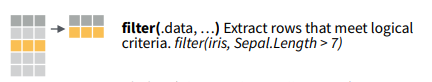

Filter returns only those observations (rows) which satistfy the criteria you pass.

To get BTC prices, for example we would pass `filter(ticker == 'BTC')`

A common mistake is to use `=` instead of `==`

In [ ]:
prices %>%
  filter(ticker == 'BTC') %>%
  tail() # returns the last observations in the table

ticker,date,price_usd,market_cap
<chr>,<date>,<dbl>,<dbl>
BTC,2021-06-17,38018.64,712367675979
BTC,2021-06-18,35714.31,669218352696
BTC,2021-06-19,35555.98,666274332005
BTC,2021-06-20,35599.94,667121552365
BTC,2021-06-21,31715.16,594343881161
BTC,2021-06-22,32394.56,607094219838


You can use `%in%` to return prices for multiple assets. 

Pass `filter(ticker %in% vector_of_tickers)`

In [ ]:
prices %>% 
  filter(ticker %in% c('BTC','ETH')) %>%
  arrange(date) %>% # don't worry about this for now, we'll get it next.
  tail() 

ticker,date,price_usd,market_cap
<chr>,<date>,<dbl>,<dbl>
BTC,2021-06-20,35599.942,667121552365
ETH,2021-06-20,2242.663,260988781493
BTC,2021-06-21,31715.160,594343881161
ETH,2021-06-21,1900.393,221182330319
BTC,2021-06-22,32394.556,607094219838
ETH,2021-06-22,1867.624,217393580268


### The `arrange()` dplyr verb
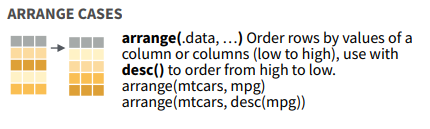

Arrange reorders the observations (rows) in your data.

Here we reorder the data to be in ascending order of market cap.

In [ ]:
prices %>%
  arrange(market_cap) %>%
  head()

ticker,date,price_usd,market_cap
<chr>,<date>,<dbl>,<dbl>
HBTC,2019-12-09,7340.227,0
HBTC,2019-12-10,7232.092,0
HBTC,2019-12-11,7200.464,0
HBTC,2019-12-12,7192.849,0
HBTC,2019-12-13,7244.904,0
HBTC,2019-12-14,7071.107,0


And we can wrap `desc()` around it to do it in descending order.


In [ ]:
prices %>%
  arrange(desc(price_usd)) %>%
  head()

ticker,date,price_usd,market_cap
<chr>,<date>,<dbl>,<dbl>
YFI,2021-05-11,80554.72,2953619258
YFI,2021-05-14,77983.35,2859337503
YFI,2021-05-18,72674.50,2664683282
YFI,2021-05-12,70879.04,2598850789
YFI,2021-05-15,66997.95,2456546756
YFI,2021-05-13,65430.67,2399080792


We can sort my multiple criteria. Here we are sorting by date descending, then by market_cap ascending. 

In [ ]:
prices %>%
  arrange(desc(date), market_cap) %>%
  head()

ticker,date,price_usd,market_cap
<chr>,<date>,<dbl>,<dbl>
DGX,2021-06-22,51.61700000,4026126
TRX,2021-06-22,0.05076883,5076883
SWRV,2021-06-22,0.60244792,9053084
PAY,2021-06-22,0.04881967,10018688
ENG,2021-06-22,0.07988675,11983012
GRIN,2021-06-22,0.23480949,17960446


### The `select()` dplyr verb

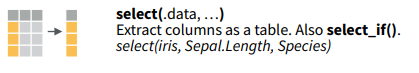

`select()` is used to pull out certain columns from your data.

Here we use `select(ticker, date, market_cap)` to pull out just those three columns.

In [ ]:
prices %>%
  select(ticker, date, market_cap) %>%
  head()

ticker,date,market_cap
<chr>,<date>,<dbl>
1INCH,2020-12-26,2428992153
1INCH,2020-12-27,1608525301
1INCH,2020-12-28,1657011227
1INCH,2020-12-29,1340685538
1INCH,2020-12-30,1651959828
1INCH,2020-12-31,2047856106


You don't always have to name the columns you want. There are a variety of ways to select columns. 

For example `select(-date)` selects everything *except* date.

In [ ]:
prices %>%
  select(-date) %>%
  head()

ticker,price_usd,market_cap
<chr>,<dbl>,<dbl>
1INCH,1.6193281,2428992153
1INCH,1.0723502,1608525301
1INCH,1.1046742,1657011227
1INCH,0.8937904,1340685538
1INCH,1.1013066,1651959828
1INCH,1.3652374,2047856106


And `select(contains('usd'))` gets all columns which contain the text "usd"

In [ ]:
prices %>%
  select(contains('usd')) %>%
  head()

price_usd
<dbl>
1.6193281
1.0723502
1.1046742
0.8937904
1.1013066
1.3652374


You can find many more examples here https://dplyr.tidyverse.org/reference/select.html

### Chaining transformations together

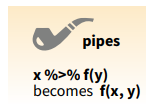

We've now learned enough transformations to see how they can be usefully chained together.

The following transformation:

*   filters out a single coin
*   selects the date and market_cap
*   re-arranges by date descending.







In [ ]:
prices %>% 
  filter(ticker == 'SUSHI') %>%
  select(date, market_cap) %>%
  arrange(desc(date)) %>%
  head()

date,market_cap
<date>,<dbl>
2021-06-22,1524734789
2021-06-21,1500096481
2021-06-20,1901510411
2021-06-19,1690333708
2021-06-18,1750977039
2021-06-17,1894324367


A lot of things you'll be doing look like this.

### The `mutate()` dplyr verb

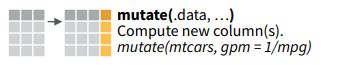

So far we’ve just filtered selected and re-arranged existing data. Now we’re going to look at creating new data.

Mutate lets us add variables (columns) to our data. These are usually derived from existing columns.

Here we use mutate to create a new column called `log_market_cap`, which is calculated as the log of the `market_cap` variable.

`mutate(log_market_cap = log(market_cap))` takes the log of `market_cap` for each row in the data and sticks it as another column on the side of the data.

In [ ]:
prices %>%
  mutate(log_market_cap = log(market_cap)) %>%
  head()

ticker,date,price_usd,market_cap,log_market_cap
<chr>,<date>,<dbl>,<dbl>,<dbl>
1INCH,2020-12-26,1.6193281,2428992153,21.61074
1INCH,2020-12-27,1.0723502,1608525301,21.19858
1INCH,2020-12-28,1.1046742,1657011227,21.22828
1INCH,2020-12-29,0.8937904,1340685538,21.01645
1INCH,2020-12-30,1.1013066,1651959828,21.22523
1INCH,2020-12-31,1.3652374,2047856106,21.44006


### The `summarise()` dplyr verb

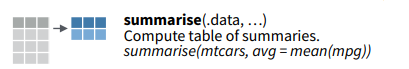

`summarise()` summarises all obeservations into a single row.

Whereas `mutate` calculated a new measurement for each row in our data, `summarise()` shrinks our data down to only one aggregated observation.

For example, here we use `summarise()` to calculate the following aggregations:

- the maximum market cap over all our data - using `max()`
- a count of the number of rows in our data - using `n()`

In [ ]:
prices %>%
  summarise(max_market_cap = max(market_cap),
            count = n()) %>%
  head()


max_market_cap,count
<dbl>,<int>
1.185279e+12,123285


It has aggreagated and condensed all our data down to a single summary row.

### The `group_by()` dplyr verb

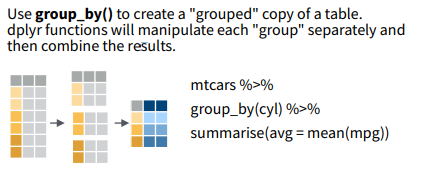

Summarising the entire data in one go isn't always what you want to do.

Often you want to:

- group by a variable
- then traansform that grouped data.

The `group_by()` function tells the `dplyr` verbs to operate on each group one at a time.


### Using `group_by()` and `summarise()` together

IF we `group_by(ticker)`, then call `summarise()` then dplyr will perform the summary aggregations separately for each ticker. 

We won't get a single row. 
We'll get a row for each different ticker in the data set.

In [ ]:
prices %>% 
  group_by(ticker) %>%
  summarise(mean_market_cap = mean(market_cap)) %>%
  head()

ticker,mean_market_cap
<chr>,<dbl>
1INCH,5906494906
AAVE,4183521339
ADA,8049916391
ALPHA,973312440
ANT,93397251
BAL,1090832834


We can also group by multiple variables. In this case, we calculate the mean market cap for each ticker for each year.

In [ ]:
prices %>%
  mutate(year = year(date)) %>%
  group_by(ticker, year) %>%
  summarise(mean_market_cap = mean(market_cap)) %>%
  head()

`summarise()` has grouped output by 'ticker'. You can override using the `.groups` argument.



ticker,year,mean_market_cap
<chr>,<dbl>,<dbl>
1INCH,2020,1789171692
1INCH,2021,6049292243
AAVE,2020,1014805815
AAVE,2021,5703772139
ADA,2017,9877881359
ADA,2018,6428593604


### Using `group_by()` and `mutate()` to do grouped row-level observations

We can also use `group_by` with `mutate()` to calculate new variables which are calculated separately for a given variable (or set of variables)

You’ll use this nearly every time you do any quant analysis to calculate periodic returns.

Here we use `group_by()` with `mutate()` and `lag()` to calculate daily returns. 

The `group_by()` tells dplyr not to mix up observations from different tickers. If we left it out it would just calculate returns in the order the appear in the dataset, and we'd get some returns trying to be calculated from prices on different tickers.

In [ ]:
prices %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(simple_returns = price_usd / lag(price_usd) - 1) %>% 
  head()

ticker,date,price_usd,market_cap,simple_returns
<chr>,<date>,<dbl>,<dbl>,<dbl>
BTC,2010-07-18,0.08584000,295959.2,NA
BTC,2010-07-19,0.08080000,279285.2,-0.05871389
BTC,2010-07-20,0.07473573,259000.4,-0.07505286
BTC,2010-07-21,0.07919286,275266.5,0.05963859
BTC,2010-07-22,0.05846976,203749.6,-0.26167891
BTC,2010-07-23,0.06059287,211735.7,0.03631124


You'll follow this pattern a lot. 

## Summary

Arrange your data in a "tidy" fashion such that:

 - Every column is a variable
 - Every row is an observation.

 You can then easily use dplyr to manipulate that data very efficeintly. 

* A forthcoming lesson will cover wrangling messy data into shape using tidyr. *

There are 6 main functions to master in dplyr:


*   `filter()` picks outs observations (rows) by some filter criteria
*   `arrange()` reorders the observations (rows)
*   `select()` picks out the variables (columns)
*    `mutate()` creates new variables (columns) by applying transformations to existing variables
*    `summarise()` allows you to group and summarise data – reducing the data into a grouped summary with fewer rows

`Group_by()` causes the verbs above to act on a group at a time, rather than the whole dataset.











# Useful Crypto Lab Snippets


### Loading Libraries and Tools

### Loading Data

In [ ]:
# snippet: rw load rwrtools v0.4

# lists of libraries: rwRtools dependencies (install but don't load) and libs_to_load (install and load)
dependencies <- c(
  "pacman", "ttr", "googleauthr", "doparallel", "googlecloudstorager", 
  "iterators", "R.methodsS3", "openssl", "foreach", "xts", "R.oo", "feather", 
  "R.utils"
)
libs_to_load <- c("tidyverse", "lubridate", "purrr", "stringr", "zoo", "glue", "here")

# comment out next two lines if not loading rsims
rsims_dependencies <- c("stringr", "lubridate", "roll", "Rcpp")
dependencies <- c(dependencies, rsims_dependencies)

# capitalisation of call to CRAN may not always match capitalisation of package name (eg library(doParallel) vs sudo apt install r-cran-doparallel).
install_from_cran <- gsub("^(?!R\\.)([\\w]+)", "\\L\\1", unique(c(libs_to_load, dependencies)), perl = TRUE)  # convert to lowercase all letters other than an "R" at the start followed by "."

msg1 <- system2('sudo', args = c('apt-get', 'update'),
  stdout = TRUE,
  stderr = TRUE,
  wait = TRUE
)

msg2 <- system2(
  'sudo', 
  args = c('apt', 'install', sub('', 'r-cran-', install_from_cran, '-y --fix-missing')),
  stdout = TRUE,
  stderr = TRUE,
  wait = TRUE
)

pacman::p_load(char = libs_to_load, install = FALSE)

# install and load rwRtools from GH (sans dependencies)
pacman::p_load_current_gh("RWLab/rwRtools", dependencies = FALSE)

# install and load rsims from GH (sans dependencies)
pacman::p_load_current_gh("Robot-Wealth/rsims", dependencies = FALSE)

# output messages from install - optional, for debugging
# msg

# Set chart options
options(repr.plot.width = 14, repr.plot.height=7)
theme_set(theme_bw())
theme_update(text = element_text(size = 20))

In [ ]:
# snippet: rw data auth v.0.1
rwlab_data_auth()

In [ ]:
# snippet: rw crypto quickstart v.0.1
quicksetup(pod = "Crypto", path = ".")
prices %>% 
  head()


### Calculating periodic returns

In [ ]:
# snippet: rw crypto calc periodic returns v.0.1
# Calculate log and simple returns at the same periodicity as your data.
# Assumes there are no gaps in your data and your price column is price_usd (as it is in default coinmetrics data) 
returns <- prices %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(log_return = log(price_usd / lag(price_usd, n = 1))) %>%
  mutate(simple_return = price_usd / lag(price_usd, n = 1) - 1) %>%
  na.omit() 

In [ ]:
returns %>% head()

ticker,date,price_usd,market_cap,log_return,simple_return
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
BTC,2010-07-19,0.08080000,279285.2,-0.06050813,-0.05871389
BTC,2010-07-20,0.07473573,259000.4,-0.07801869,-0.07505286
BTC,2010-07-21,0.07919286,275266.5,0.05792790,0.05963859
BTC,2010-07-22,0.05846976,203749.6,-0.30337647,-0.26167891
BTC,2010-07-23,0.06059287,211735.7,0.03566752,0.03631124
BTC,2010-07-24,0.05454000,191100.0,-0.10524285,-0.09989409


### Plotting Return Histograms

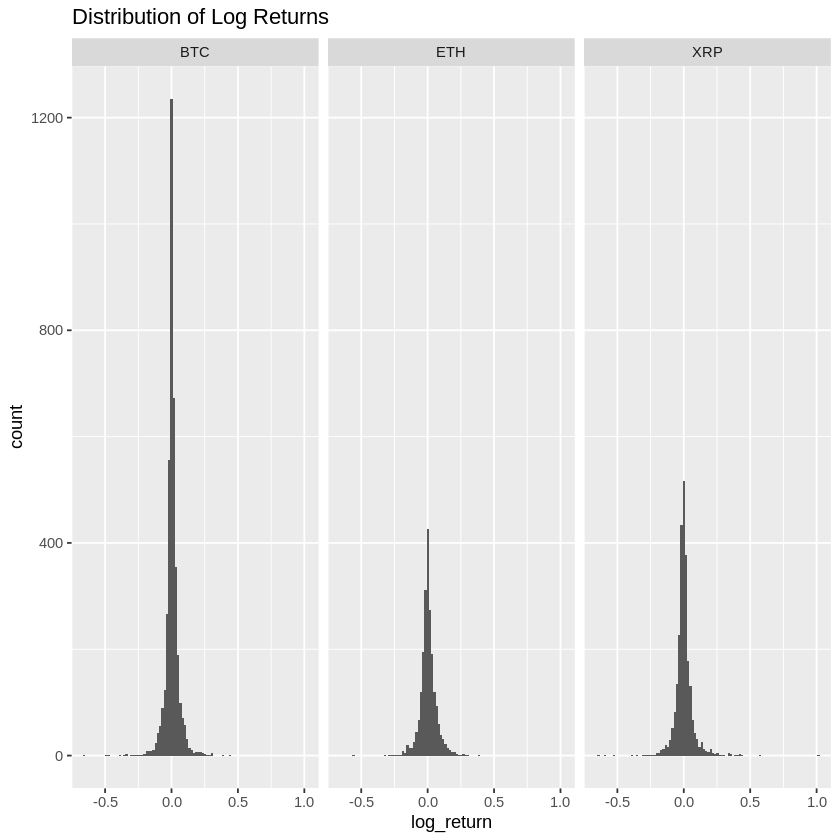

In [ ]:
# snippet: rw crytpo plot return histogram v.0.1
returns %>%
  filter(ticker %in% c('BTC','ETH','XRP')) %>%
  ggplot(aes(x = log_return)) +
    geom_histogram(position = 'identity', bins = 100) +
    ggtitle('Distribution of Log Returns') +
    facet_wrap(~ticker)

### Scatterplot example

Warning message:
“Removed 3 rows containing missing values (geom_point).”


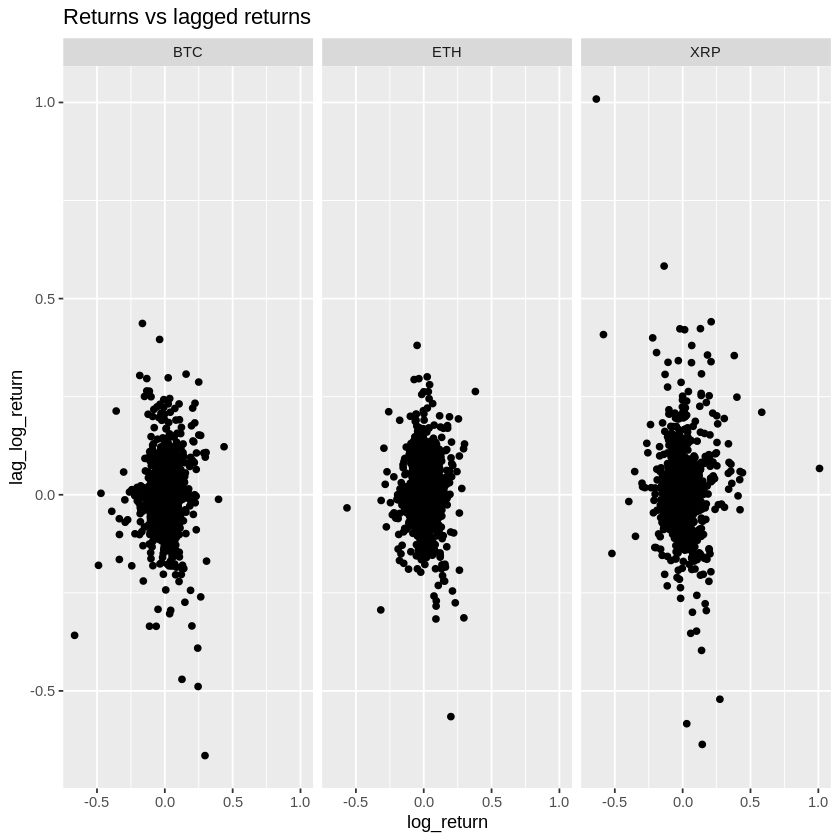

In [ ]:
# snippet: rw crypto plot return scatterplot
# Just a simple example of creating a scatterplot
returns %>%
  filter(ticker %in% c('BTC','ETH','XRP')) %>%
  mutate(lag_log_return = lag(log_return)) %>%
  ggplot(aes(x = log_return, y = lag_log_return)) +
    geom_point() + 
    ggtitle('Returns vs lagged returns') +
    facet_wrap(~ticker)